In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
data=pd.read_csv('/content/drive/MyDrive/Iris.csv')

In [6]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


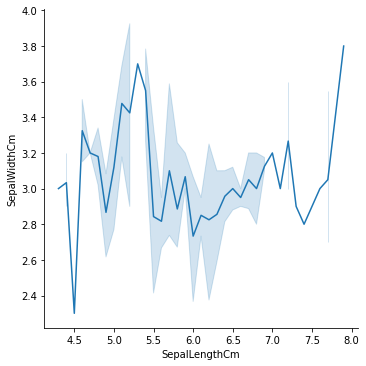

In [7]:
sns.relplot(data=data, kind='line',
            x='SepalLengthCm', y='SepalWidthCm')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 50.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.3% of the points cannot be placed; y

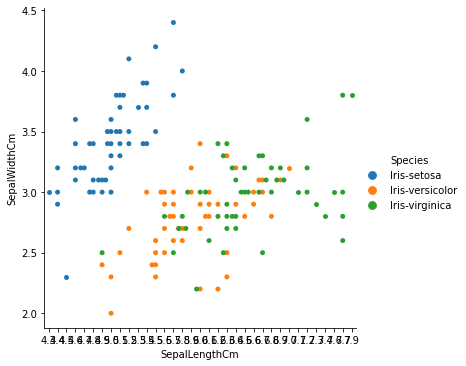

In [8]:
sns.catplot(data=data, kind='swarm', x='SepalLengthCm', y='SepalWidthCm', hue='Species')

In [9]:
from sklearn.cluster import KMeans

In [46]:
data=inputs.copy()

In [49]:
inputs=inputs.drop(['Species'], axis=1)

In [49]:
inputs

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [51]:
## finding the number of cluster
x=data.iloc[:,[0,1,2,3]].values
wcss=[]
for i in range(1,11):
  kmeans=KMeans(n_clusters=i, init='k-means++',
                max_iter=300,n_init=10, random_state=0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)

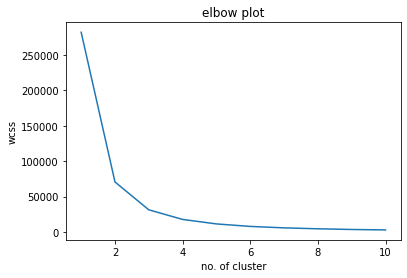

In [52]:
## plotting elbow plot
plt.plot(range(1,11), wcss)
plt.title('elbow plot')
plt.xlabel('no. of cluster')
plt.ylabel('wcss')
plt.show()

In [52]:
## from the graph we can conclude that optimum number of clusters is 3

In [55]:
## classifying
kmeams=KMeans(n_clusters=3, init='k-means++', max_iter=300,
              random_state=0, n_init=10)
y_predict=kmeans.fit_predict(x)

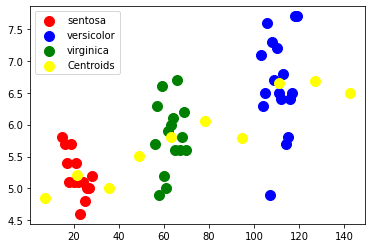

In [56]:
## ploting the clusters
plt.scatter(x[y_predict==0,0],x[y_predict==0,1],
            s=100,c='red',label='sentosa')
plt.scatter(x[y_predict==1,0],x[y_predict==1,1],
            s=100,c='blue',label='versicolor')
plt.scatter(x[y_predict==2,0],x[y_predict==2,1],
            s=100,c='green', label='virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()